# MARKOV SIMULATION-A PROGRAM THAT SIMULATES CUSTOMER BEHAVIOUR IN A SUPERMARKET

# EDA of  supermarket customer behaviours

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import plotly.express as exe 
from matplotlib import rcParams

In [2]:
df_mon=pd.read_csv('monday.csv',sep=';',parse_dates=True)
df_tue=pd.read_csv('tuesday.csv',sep=';',parse_dates=True)
df_wed=pd.read_csv('wednesday.csv',sep=';',parse_dates=True)
df_thur= pd.read_csv('thursday.csv',sep=';',parse_dates=True)             
df_frid=pd.read_csv('friday.csv',sep=';',parse_dates=True)
df_mon

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [3]:
df_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


In [4]:
df_tue

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy
...,...,...,...
4709,2019-09-03 21:47:00,1421,drinks
4710,2019-09-03 21:47:00,1422,dairy
4711,2019-09-03 21:48:00,1421,checkout
4712,2019-09-03 21:49:00,1412,checkout


Before we make the 'concat' we should adapt the 'customer_no' because after the 'concat',the number is not unique anymore!

In [5]:
df_tue.customer_no = df_tue.customer_no + df_mon.customer_no.max()

In [6]:
df_wed.customer_no = df_wed.customer_no + df_tue.customer_no.max()

In [7]:
df_thur.customer_no = df_thur.customer_no + df_wed.customer_no.max()

In [8]:
df_frid.customer_no = df_frid.customer_no + df_thur.customer_no.max()

In [9]:
df_mon.describe()

,customer_no
count,4884.000000
mean,718.274365
std,411.839636
min,1.000000
25%,366.000000
50%,720.000000
75%,1070.000000
max,1447.000000


In [10]:
#The total number of customers in each section on monday
df_mon.groupby(["location"])['customer_no'].count()

location
checkout    1437
dairy        895
drinks       797
fruit       1005
spices       750
Name: customer_no, dtype: int64

<AxesSubplot:xlabel='location'>

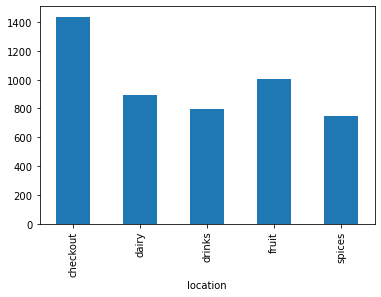

In [11]:
df_mon.groupby(["location"])['customer_no'].count().plot(kind='bar')

In [12]:
#The number of customers on monday
df_mon["customer_no"].nunique()

1447

In [13]:
df_mon.sort_values(by=['customer_no','timestamp'])

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
8,2019-09-02 07:05:00,1,checkout
1,2019-09-02 07:03:00,2,dairy
12,2019-09-02 07:06:00,2,checkout
2,2019-09-02 07:04:00,3,dairy
...,...,...,...
4874,2019-09-02 21:48:00,1444,spices
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [14]:
df_mon.sort_values(by=['location','timestamp'])

,timestamp,customer_no,location
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout
12,2019-09-02 07:06:00,2,checkout
13,2019-09-02 07:06:00,3,checkout
20,2019-09-02 07:07:00,8,checkout
...,...,...,...
4856,2019-09-02 21:46:00,1433,spices
4859,2019-09-02 21:46:00,1438,spices
4874,2019-09-02 21:48:00,1444,spices
4877,2019-09-02 21:49:00,1440,spices


In [15]:

df_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


In [16]:
df_mon.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [17]:
df_mon["weekday"]="monday"
df_tue["weekday"]="tuesday"
df_wed["weekday"]="wednesday"
df_thur["weekday"]="thursday"
df_frid["weekday"]="friday"

In [18]:
df_week= pd.concat([df_mon,df_tue,df_wed,df_thur,df_frid])
df_week


,timestamp,customer_no,location,weekday
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday
...,...,...,...,...
5120,2019-09-06 21:50:00,7435,dairy,friday
5121,2019-09-06 21:50:00,7442,checkout,friday
5122,2019-09-06 21:50:00,7443,checkout,friday
5123,2019-09-06 21:50:00,7444,drinks,friday


In [19]:
df_week['customer_id'] = df_week['customer_no'].astype(str) +'_'+ df_week['weekday'].astype(str)
df_week

,timestamp,customer_no,location,weekday,customer_id
0,2019-09-02 07:03:00,1,dairy,monday,1_monday
1,2019-09-02 07:03:00,2,dairy,monday,2_monday
2,2019-09-02 07:04:00,3,dairy,monday,3_monday
3,2019-09-02 07:04:00,4,dairy,monday,4_monday
4,2019-09-02 07:04:00,5,spices,monday,5_monday
...,...,...,...,...,...
5120,2019-09-06 21:50:00,7435,dairy,friday,7435_friday
5121,2019-09-06 21:50:00,7442,checkout,friday,7442_friday
5122,2019-09-06 21:50:00,7443,checkout,friday,7443_friday
5123,2019-09-06 21:50:00,7444,drinks,friday,7444_friday


In [20]:
#number of customers per-day
customers_per_day = pd.DataFrame(df_week.groupby("weekday")["customer_id"].nunique())
customers_per_day

,customer_id
weekday,
friday,1510
monday,1447
thursday,1535
tuesday,1422
wednesday,1531


In [21]:
#number of customers per section 

customers_per_section= pd.DataFrame(df_week.groupby("location")["customer_id"].nunique())
customers_per_section

,customer_id
location,
checkout,7417
dairy,3818
drinks,3214
fruit,4284
spices,2938


In [22]:
customers_per_location_day= pd.DataFrame(df_week.groupby("weekday")["customer_id"].nunique())

customers_per_location_day

,customer_id
weekday,
friday,1510
monday,1447
thursday,1535
tuesday,1422
wednesday,1531


In [23]:
#creating datetime objects
df_week["timestamp"] = pd.to_datetime(df_week["timestamp"])
df_week["hour"] = df_week["timestamp"].dt.hour
df_week["time"] = df_week["timestamp"].dt.time
df_week["weekofday"] = df_week["timestamp"].dt.day
df_week["month"] = df_week["timestamp"].dt.month
df_week

,timestamp,customer_no,location,weekday,customer_id,hour,time,weekofday,month
0,2019-09-02 07:03:00,1,dairy,monday,1_monday,7,07:03:00,2,9
1,2019-09-02 07:03:00,2,dairy,monday,2_monday,7,07:03:00,2,9
2,2019-09-02 07:04:00,3,dairy,monday,3_monday,7,07:04:00,2,9
3,2019-09-02 07:04:00,4,dairy,monday,4_monday,7,07:04:00,2,9
4,2019-09-02 07:04:00,5,spices,monday,5_monday,7,07:04:00,2,9
...,...,...,...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,7435,dairy,friday,7435_friday,21,21:50:00,6,9
5121,2019-09-06 21:50:00,7442,checkout,friday,7442_friday,21,21:50:00,6,9
5122,2019-09-06 21:50:00,7443,checkout,friday,7443_friday,21,21:50:00,6,9
5123,2019-09-06 21:50:00,7444,drinks,friday,7444_friday,21,21:50:00,6,9


In [24]:
#Number of customers over time
customers_per_hour = pd.DataFrame(df_week.groupby('hour')["customer_id"].nunique())


In [25]:
#df_week
customers_per_hour

,customer_id
hour,
7,492
8,745
9,521
10,461
11,370
12,424
13,571
14,542
15,445


In [26]:
#total number of customers per section over time
total_cust_over_time = pd.DataFrame(df_week.groupby(["location","hour"])["customer_id"].nunique())
total_cust_over_time 

customer_id
location hour             
checkout 7             454
         8             677
         9             455
         10            427
         11            342
...                    ...
spices   17            219
         18            275
         19            309
         20            201
         21            104

[75 rows x 1 columns]

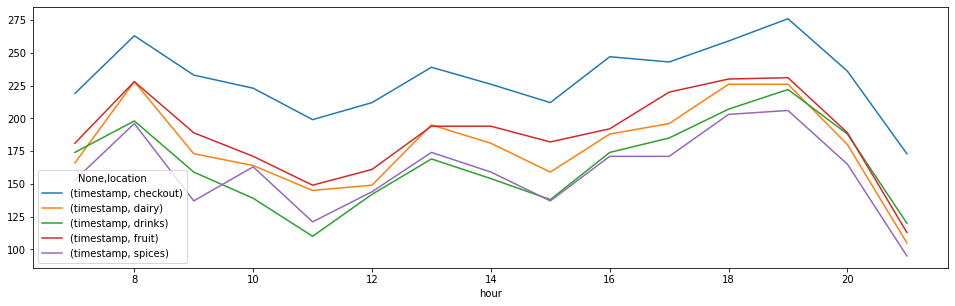

In [27]:
rcParams["figure.figsize"] = [16.4, 4.8]
total_cust_over_time = pd.DataFrame(df_week.groupby(["location","hour"])["timestamp"].nunique()).unstack(0).plot()

In [28]:
df_week = df_week.sort_values(['customer_no','timestamp'])
df_week

,timestamp,customer_no,location,weekday,customer_id,hour,time,weekofday,month
0,2019-09-02 07:03:00,1,dairy,monday,1_monday,7,07:03:00,2,9
8,2019-09-02 07:05:00,1,checkout,monday,1_monday,7,07:05:00,2,9
1,2019-09-02 07:03:00,2,dairy,monday,2_monday,7,07:03:00,2,9
12,2019-09-02 07:06:00,2,checkout,monday,2_monday,7,07:06:00,2,9
2,2019-09-02 07:04:00,3,dairy,monday,3_monday,7,07:04:00,2,9
...,...,...,...,...,...,...,...,...,...
5121,2019-09-06 21:50:00,7442,checkout,friday,7442_friday,21,21:50:00,6,9
5114,2019-09-06 21:48:00,7443,dairy,friday,7443_friday,21,21:48:00,6,9
5122,2019-09-06 21:50:00,7443,checkout,friday,7443_friday,21,21:50:00,6,9
5123,2019-09-06 21:50:00,7444,drinks,friday,7444_friday,21,21:50:00,6,9


In [29]:
df_week.location.shift(-1)

0       checkout
8          dairy
1       checkout
12         dairy
2       checkout
          ...   
5121       dairy
5114    checkout
5122      drinks
5123      spices
5124         NaN
Name: location, Length: 24877, dtype: object

In [30]:
df_week['next_location']=df_week.location.shift(-1)
df_week

,timestamp,customer_no,location,weekday,customer_id,hour,time,weekofday,month,next_location
0,2019-09-02 07:03:00,1,dairy,monday,1_monday,7,07:03:00,2,9,checkout
8,2019-09-02 07:05:00,1,checkout,monday,1_monday,7,07:05:00,2,9,dairy
1,2019-09-02 07:03:00,2,dairy,monday,2_monday,7,07:03:00,2,9,checkout
12,2019-09-02 07:06:00,2,checkout,monday,2_monday,7,07:06:00,2,9,dairy
2,2019-09-02 07:04:00,3,dairy,monday,3_monday,7,07:04:00,2,9,checkout
...,...,...,...,...,...,...,...,...,...,...
5121,2019-09-06 21:50:00,7442,checkout,friday,7442_friday,21,21:50:00,6,9,dairy
5114,2019-09-06 21:48:00,7443,dairy,friday,7443_friday,21,21:48:00,6,9,checkout
5122,2019-09-06 21:50:00,7443,checkout,friday,7443_friday,21,21:50:00,6,9,drinks
5123,2019-09-06 21:50:00,7444,drinks,friday,7444_friday,21,21:50:00,6,9,spices


In [31]:
df_week.loc[df_week['location']=='checkout','next_location']='checkout'
df_week

,timestamp,customer_no,location,weekday,customer_id,hour,time,weekofday,month,next_location
0,2019-09-02 07:03:00,1,dairy,monday,1_monday,7,07:03:00,2,9,checkout
8,2019-09-02 07:05:00,1,checkout,monday,1_monday,7,07:05:00,2,9,checkout
1,2019-09-02 07:03:00,2,dairy,monday,2_monday,7,07:03:00,2,9,checkout
12,2019-09-02 07:06:00,2,checkout,monday,2_monday,7,07:06:00,2,9,checkout
2,2019-09-02 07:04:00,3,dairy,monday,3_monday,7,07:04:00,2,9,checkout
...,...,...,...,...,...,...,...,...,...,...
5121,2019-09-06 21:50:00,7442,checkout,friday,7442_friday,21,21:50:00,6,9,checkout
5114,2019-09-06 21:48:00,7443,dairy,friday,7443_friday,21,21:48:00,6,9,checkout
5122,2019-09-06 21:50:00,7443,checkout,friday,7443_friday,21,21:50:00,6,9,checkout
5123,2019-09-06 21:50:00,7444,drinks,friday,7444_friday,21,21:50:00,6,9,spices


In [32]:
#filling NANs with checkout
df_week.fillna('checkout',inplace=True)
df_week

,timestamp,customer_no,location,weekday,customer_id,hour,time,weekofday,month,next_location
0,2019-09-02 07:03:00,1,dairy,monday,1_monday,7,07:03:00,2,9,checkout
8,2019-09-02 07:05:00,1,checkout,monday,1_monday,7,07:05:00,2,9,checkout
1,2019-09-02 07:03:00,2,dairy,monday,2_monday,7,07:03:00,2,9,checkout
12,2019-09-02 07:06:00,2,checkout,monday,2_monday,7,07:06:00,2,9,checkout
2,2019-09-02 07:04:00,3,dairy,monday,3_monday,7,07:04:00,2,9,checkout
...,...,...,...,...,...,...,...,...,...,...
5121,2019-09-06 21:50:00,7442,checkout,friday,7442_friday,21,21:50:00,6,9,checkout
5114,2019-09-06 21:48:00,7443,dairy,friday,7443_friday,21,21:48:00,6,9,checkout
5122,2019-09-06 21:50:00,7443,checkout,friday,7443_friday,21,21:50:00,6,9,checkout
5123,2019-09-06 21:50:00,7444,drinks,friday,7444_friday,21,21:50:00,6,9,spices


In [33]:
customer_checkedout=df_week[((df_week.location=='checkout')&(df_week.next_location=='checkout'))]['customer_no'].to_list()
customer_checkedout

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [34]:
customer_checkedout.append(7445)
max(customer_checkedout)

7445

In [35]:
#customer not checkout
notchecked=[]
for i in df_week.customer_no:
    if i not in customer_checkedout:
        notchecked.append(i)
pd.DataFrame(notchecked[:-1]).drop_duplicates()

,0
0,1430
5,1433
9,1437
12,1439
13,1440
15,1441
18,1443
20,1445
21,1446
22,1447


In [36]:
#filter out customers who have only checkedout
df_week=df_week[df_week.customer_no.isin(customer_checkedout)]
df_week

,timestamp,customer_no,location,weekday,customer_id,hour,time,weekofday,month,next_location
0,2019-09-02 07:03:00,1,dairy,monday,1_monday,7,07:03:00,2,9,checkout
8,2019-09-02 07:05:00,1,checkout,monday,1_monday,7,07:05:00,2,9,checkout
1,2019-09-02 07:03:00,2,dairy,monday,2_monday,7,07:03:00,2,9,checkout
12,2019-09-02 07:06:00,2,checkout,monday,2_monday,7,07:06:00,2,9,checkout
2,2019-09-02 07:04:00,3,dairy,monday,3_monday,7,07:04:00,2,9,checkout
...,...,...,...,...,...,...,...,...,...,...
5113,2019-09-06 21:48:00,7442,dairy,friday,7442_friday,21,21:48:00,6,9,checkout
5121,2019-09-06 21:50:00,7442,checkout,friday,7442_friday,21,21:50:00,6,9,checkout
5114,2019-09-06 21:48:00,7443,dairy,friday,7443_friday,21,21:48:00,6,9,checkout
5122,2019-09-06 21:50:00,7443,checkout,friday,7443_friday,21,21:50:00,6,9,checkout


# Transition Probabilities

#Analyze how customers switch between sections of the supermarket. Calculate and visualize the probability of #transitions from section A to B by counting all observed transitions.

In [37]:
#Transitition matrix gives us the probabilities of customers moving another section.
transition_mat=pd.crosstab(df_week.location,df_week.next_location,normalize=0)
transition_mat

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.392389,0.000000,0.222318,0.189852,0.195442
drinks,0.538956,0.027256,0.000000,0.217794,0.215994
fruit,0.500784,0.236966,0.136417,0.000000,0.125833
spices,0.251872,0.323529,0.272727,0.151872,0.000000


<AxesSubplot:xlabel='next_location', ylabel='location'>

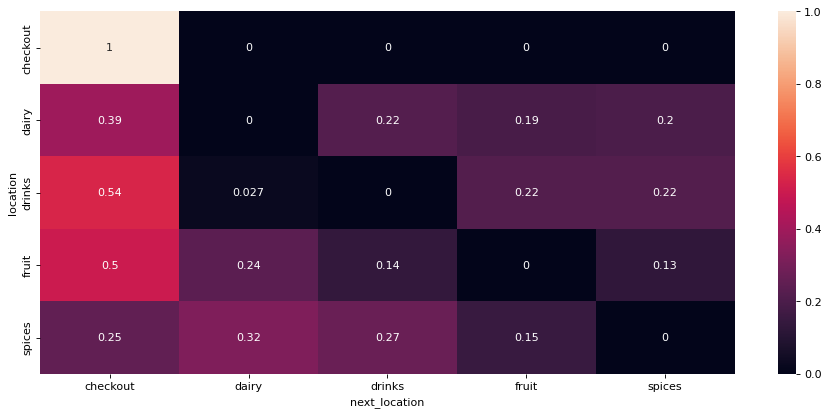

In [38]:
#Heatmap of the transition matrix
from matplotlib.pyplot import figure

figure(figsize=(14, 6), dpi=80)

sns.heatmap(transition_mat, annot=True)


In [39]:
starting_location=['spices','drinks', 'fruit','dairy']
starting_states=np.array([0.4,0.3,0.2,0.1])
np.random.choice(starting_location,p=starting_states)

'drinks'

In [40]:
strtstate = np.random.choice(starting_location,p=starting_states)
strtstate

'spices'

In [41]:
transition_mat.loc[strtstate]

next_location
checkout    0.251872
dairy       0.323529
drinks      0.272727
fruit       0.151872
spices      0.000000
Name: spices, dtype: float64

In [42]:
np.random.choice(transition_mat.loc[strtstate].index,p=transition_mat.loc[strtstate].values)

'dairy'

In [43]:

class Customer:
    def __init__(self,starting_location=np.random.choice(starting_location,p=np.array([0.4,0.3,0.2,0.1]))):
        self.location=starting_location
        self.list_of_locations=[]

    def move(self):
            self.location = np.random.choice(['spices','drinks', 'fruit','checkout','dairy'], size=1, p=[0.27, 0.15, 0.25,0.17,0.16 ])[0]
            self.list_of_locations.append(self.location)
    def __repr__ (self):
        return f'Customer object at {self.location}'
    


An example of one of the teachers :)

In [45]:
class Supermarket:
    """manages multiple Customer instances that are currently in the market.    """
    
    def __init__(self):
         #a list of Customer objects
        self.time = []
        self.list_of_customers=[]
        self.number_of_customers=0
        
    def open_supermarket(self):
        for time_step in range (15*60):
            self.time=time_step
            self.add_customers()
            self.move_customers()
            self.checkout_customers()
    def add_customers(self): 
         for _ in range(np.random.randint(3)):
            customer=Customer()   
            self.list_of_customers.append(customer)
            self.number_of_customers=len(self.list_of_customers)
    def move_customers(self):   
        for customer in self.list_of_customers:
            customer.move()
            
    def checkout_customers(self):  
        ids_to_delete=[]
        for customer_id, customer in enumerate(self.list_of_customers):
                if customer.location=='checkout':
                    ids_to_delete.append(customer_id)
        ids_to_delete.reverse()  
        for customer_id in ids_to_delete:
            print(self.list_of_customers[customer_id])
            del self.list_of_customers[customer_id]
            
    def __repr__(self):
        return f'Supermarket class at time {self.time} and {self.number_of_customers} customers shopping.'

In [46]:
        supermarket=Supermarket()
        supermarket.open_supermarket()
        print(supermarket)


Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at c

Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at checkout
Customer object at c